In [1]:
import pandas as pd

In [2]:
leases = pd.read_csv('C:\\SMU\\DataFest\\selected\\Leases.csv')
mmod = pd.read_csv('C:\\SMU\\DataFest\\selected\\Major_Market_Occupancy_Data.csv')

## unemployment for NY

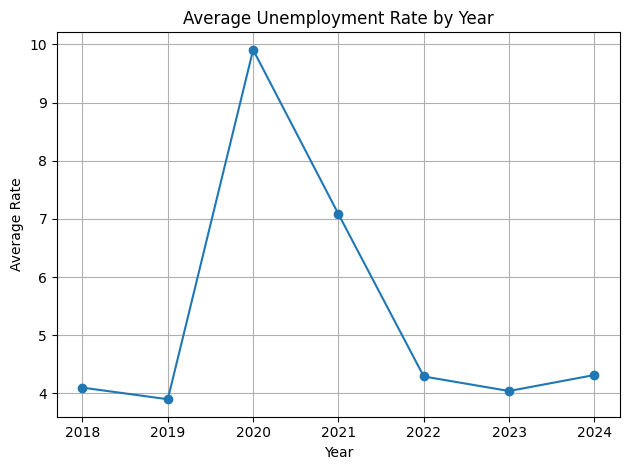

In [8]:
# import unemployment data for New York, state wide, seasonally adjusted
data = {'Year': [2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Jan': [4.5, 4.0, 4.1, 8.6, 5.2, 4.0, 4.2],
    'Feb': [4.4, 3.9, 4.2, 8.4, 4.8, 4.0, 4.1],
    'Mar': [4.3, 3.9, 4.2, 8.1, 4.6, 4.0, 4.2],
    'Apr': [4.2, 3.8, 15.7, 7.9, 4.5, 3.9, 4.2],
    'May': [4.1, 3.8, 16.7, 7.5, 4.3, 3.9, 4.3],
    'Jun': [4.0, 3.8, 13.6, 7.5, 4.2, 3.9, 4.4],
    'Jul': [3.9, 3.8, 12.6, 7.1, 4.0, 4.0, 4.4],
    'Aug': [3.9, 3.9, 10.8, 6.8, 3.8, 4.1, 4.4],
    'Sep': [3.9, 3.9, 10.2, 6.2, 3.9, 4.1, 4.4],
    'Oct': [4.0, 4.0, 9.2, 5.9, 4.0, 4.2, 4.4],
    'Nov': [4.0, 4.0, 8.9, 5.6, 4.1, 4.2, 4.4],
    'Dec': [4.0, 4.0, 8.7, 5.4, 4.1, 4.2, 4.4]}

df = pd.DataFrame(data)
long_df = df.melt(id_vars='Year', var_name='Month', value_name='Rate')
import matplotlib.pyplot as plt

long_df.groupby('Year')['Rate'].mean().plot(kind='line', marker='o')
plt.title('Average Unemployment Rate by Year')
plt.ylabel('Average Rate')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


## go-stay proportion > 0.5 growing 
growing (occupany proportions, go-stay , percent change per quarter of leases, unemployment rate, GDP?)
anova output occupany rate 
chi square growing or not per industry

1. create a function that combines go or stay proportion, with other variables to make a growth rate for particular market
2. A client will come to us and say they want to enter this specific market
3. So we use this function and create a time series model that will predict the growth rate of this market for the next year 
4. This is specific to an industry 


### create function

In [124]:
df = pd.read_csv("C:/SMU/DataFest/growth_index_data.csv")
df.head()

,market,quarter,year,county_name,internal_industry,internal_class,go_proportion,quarter_percent_change_lease,worked_at_home_rate,internal_class_rent
0,Atlanta,Q1,2018,Fulton County,Financial Services and Insurance,A,0.591837,34.187179,0.041473,27.655891
1,Atlanta,Q1,2018,Fulton County,Financial Services and Insurance,O,0.591837,0.000000,0.041473,18.560886
2,Atlanta,Q1,2018,Fulton County,Legal Services,A,0.466667,0.000000,0.041473,27.655891
3,Atlanta,Q1,2018,Fulton County,"Technology, Advertising, Media, and Information",A,0.789474,34.187179,0.041473,27.655891
4,Atlanta,Q1,2018,Fulton County,"Technology, Advertising, Media, and Information",O,0.789474,-20.304267,0.041473,18.560886


### create data to use (can skip if have data file)

In [50]:
# calculate percent change per quarter of leases
print(df.shape)
df = leases[leases['internal_industry'].isin(['Legal Services', 'Financial Services and Insurance', 'Technology, Advertising, Media, and Information'])]


# Sort by market, then by year, then by quarter (or date, if applicable)
df = df.sort_values(by=['year', 'quarter'])

# Group by market and calculate the percent change of 'leases' for each market
df['quarter_percent_change_lease'] = df.groupby('market')['leasing'].pct_change() * 100

# Impute NaN values in the 'quarter_percent_change_lease' column with 0
# Impute NaN values in the 'quarter_percent_change_lease' column with 0
df['quarter_percent_change_lease'] = df['quarter_percent_change_lease'].fillna(0)
print(df.shape)


(10197, 38)
(10197, 36)


C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\3988507892.py:10: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['quarter_percent_change_lease'] = df.groupby('market')['leasing'].pct_change() * 100


In [72]:
# calculate go_stay proportion by market

df['go_stay'] = df['transaction_type'].apply(lambda x: 'go' if x in ['New', 'Relocation'] else 'stay')
df['go_stay'].value_counts()

df['go_proportion'] = df.groupby(['market', 'internal_industry', 'quarter'])['go_stay'].transform(lambda x: (x == "go").mean())
df.head(3)
#print(df.shape)

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing,quarter_percent_change_lease,go_stay,go_proportion
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,0.0,stay,0.591837
9,2018,Q1,1.0,Atlanta,271 17th,Atlanta_Midtown_Atlanta_271 17th_271 17th St NW,271 17th St NW,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,0.0,go,0.789474
14,2018,Q1,1.0,Atlanta,Bank of America Plaza,Atlanta_Downtown_Atlanta_Bank of America Plaza...,600 Peachtree St NE,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,0.0,go,0.789474


In [22]:
# add remote work adoption
remote_work = pd.read_csv("C:/SMU/DataFest/remote_work_by_country.csv")
remote_work.head(5)

,county_name,worked_at_home_rate,employed_pop,commuters_by_public_transportation_rate,total_pop
0,Baltimore City,0.037467,277954.000000,0.178950,619796.0
1,Cook County,0.052146,843658.333333,0.066269,1753667.0
2,Davidson County,0.041019,218648.000000,0.012392,421220.0
3,Essex County,0.049471,159002.800000,0.054382,326356.0
4,Fairfax city,0.070126,12834.000000,0.099501,23580.0


In [37]:
df_focused = df[df['market'].isin(['Atlanta', 'Austin', 'Baltimore', 'Boston', 'Charlotte', 'Chicago Suburbs', 'Detroit', 'Houston', 'Los Angeles', 'Manhattan', 
                                    'Nashville','Northern New Jersey', 'Northern Virginia', 'Philadelphia', 'Phoenix', 'Salt Lake City', 'San Diego', 'San Francisco',
                                    'Seattle', 'South Florida', 'Tampa'])]

In [42]:
county_dict = {
    'Atlanta': 'Fulton County',
    'Austin': 'Travis County',
    'Baltimore': 'Baltimore City',
    'Boston': 'Suffolk County',
    'Charlotte': 'Mecklenburg County',
    'Chicago Suburbs': 'Cook County',
    'Detroit': 'Wayne County',
    'Houston': 'Harris County',
    'Los Angeles': 'Los Angeles County',
    'Manhattan': 'New York County',
    'Nashville': 'Davidson County',
    'Northern New Jersey': 'Essex County',
    'Northern Virginia': 'Fairfax city',
    'Philadelphia': 'Philadelphia County',
    'Phoenix': 'Maricopa County',
    'Salt Lake City': 'Salt Lake County',
    'San Diego': 'San Diego County',
    'San Francisco': 'San Francisco County',
    'Seattle': 'King County',
    'South Florida': 'Miami-Dade County',
    'Tampa': 'Hillsborough County'
}


In [39]:
len(df_focused['market'].unique())

21

In [113]:
df_very_focused = df_focused[['market', 'quarter', 'year', 'go_proportion', 'quarter_percent_change_lease', 'internal_industry', 'internal_class','internal_class_rent']]
df_very_focused = df_very_focused.drop_duplicates()
df_very_focused.head(10)
print(df_very_focused.shape)

(3342, 8)


In [114]:
df_very_focused['county_name'] = df_very_focused['market'].map(county_dict)
print(df_very_focused.shape)
# Merge remote_work and df_very_focused on 'county_name'
df_final = pd.merge(df_very_focused, remote_work, on='county_name', how='left')

# Save the final dataframe to a CSV file
df_final.to_csv('df_final.csv', index=False)

df_final.tail(5)
print(df_final.shape)

(3342, 9)
(3342, 13)


In [82]:
df_very_focused.head(10)

,market,quarter,year,go_proportion,quarter_percent_change_lease,internal_industry,county_name
0,Atlanta,Q1,2018,0.591837,0.000000,Financial Services and Insurance,Fulton County
9,Atlanta,Q1,2018,0.789474,0.000000,"Technology, Advertising, Media, and Information",Fulton County
106,Austin,Q1,2018,0.625000,0.000000,Legal Services,Travis County
135,Austin,Q1,2018,0.833333,836.536618,Financial Services and Insurance,Travis County
138,Austin,Q1,2018,0.833333,0.000000,Financial Services and Insurance,Travis County
309,Boston,Q1,2018,0.576923,0.000000,"Technology, Advertising, Media, and Information",Suffolk County
380,Charlotte,Q1,2018,0.600000,0.000000,Legal Services,Mecklenburg County
384,Charlotte,Q1,2018,0.903226,555.557682,Financial Services and Insurance,Mecklenburg County
387,Charlotte,Q1,2018,0.800000,0.000000,"Technology, Advertising, Media, and Information",Mecklenburg County
388,Charlotte,Q1,2018,0.903226,0.000000,Financial Services and Insurance,Mecklenburg County


In [83]:
df_final[['market', 'county_name', 'worked_at_home_rate', 'quarter', 'year', 'go_proportion', 'quarter_percent_change_lease']].head(5)

,market,county_name,worked_at_home_rate,quarter,year,go_proportion,quarter_percent_change_lease
0,Atlanta,Fulton County,0.041473,Q1,2018,0.591837,0.000000
1,Atlanta,Fulton County,0.041473,Q1,2018,0.789474,0.000000
2,Austin,Travis County,0.082316,Q1,2018,0.625000,0.000000
3,Austin,Travis County,0.082316,Q1,2018,0.833333,836.536618
4,Austin,Travis County,0.082316,Q1,2018,0.833333,0.000000


In [121]:
df_srsly_final = df_final.groupby(['market', 'quarter', 'year', 'county_name', 'internal_industry', 'internal_class'], as_index=False).agg({
    'go_proportion': 'mean',
    'quarter_percent_change_lease': 'mean',
    'worked_at_home_rate': 'mean',
    # 'internal_class': 'first',
    'internal_class_rent': 'mean'

})

# Check the result
df_srsly_final.head(10)
print(df_srsly_final.shape)

(2190, 10)


In [122]:
# Save df_srsly_final to a CSV file
df_srsly_final.to_csv("C:/SMU/DataFest/growth_index_data.csv", index=False)

### actual calculations

In [137]:

df_norm = df.copy()
df_norm['normalized_go_proportion'] = df.groupby('internal_industry')['go_proportion'].transform(lambda x: (x - x.mean()) / x.std())
df_norm['normalized_percent_change_leases'] = df.groupby('internal_industry')['quarter_percent_change_lease'].transform(lambda x: (x - x.mean()) / x.std())
df_norm['normalized_remote_work'] = df.groupby('internal_industry')['worked_at_home_rate'].transform(lambda x: (x - x.mean()) / x.std())

df_tech = df_norm[df_norm['internal_industry'] == 'Technology, Advertising, Media, and Information'].copy()
df_legal = df_norm[df_norm['internal_industry'] == 'Legal Services'].copy()
df_finance = df_norm[df_norm['internal_industry'] == 'Financial Services and Insurance'].copy()

w1, w2, w3 = 0.5, 0.3, 0.2

# Now calculate the growth index for each industry
df_tech['growth_index'] = (w1 * df_tech['normalized_go_proportion'] +
                           w2 * df_tech['normalized_percent_change_leases'] -
                           w3 * df_tech['normalized_remote_work'])

df_legal['growth_index'] = (w1 * df_legal['normalized_go_proportion'] +
                            w2 * df_legal['normalized_percent_change_leases'] -
                            w3 * df_legal['normalized_remote_work'])

df_finance['growth_index'] = (w1 * df_finance['normalized_go_proportion'] +
                              w2 * df_finance['normalized_percent_change_leases'] -
                              w3 * df_finance['normalized_remote_work'])


In [138]:
# Min-Max scaling to range [-1, 1]
df_tech['growth_index_normalized'] = 2 * ((df_tech['growth_index'] - df_tech['growth_index'].min()) /
                                                 (df_tech['growth_index'].max() - df_tech['growth_index'].min())) - 1

# Min-Max scaling to range [-1, 1]
df_legal['growth_index_normalized'] = 2 * ((df_legal['growth_index'] - df_legal['growth_index'].min()) /
                                                 (df_legal['growth_index'].max() - df_legal['growth_index'].min())) - 1

# Min-Max scaling to range [-1, 1]
df_finance['growth_index_normalized'] = 2 * ((df_finance['growth_index'] - df_finance['growth_index'].min()) /
                                                 (df_finance['growth_index'].max() - df_finance['growth_index'].min())) - 1

In [142]:
# Rescale from [-1, 0] to [-1, 1]
df_tech['growth_index_rescaled'] = 2 * (df_tech['growth_index_normalized'] - (-1)) / (0 - (-1)) - 1
df_legal['growth_index_rescaled'] = 2 * (df_legal['growth_index_normalized'] - (-1)) / (0 - (-1)) - 1
df_finance['growth_index_rescaled'] = 2 * (df_finance['growth_index_normalized'] - (-1)) / (0 - (-1)) - 1


In [139]:
df_tech.head(5)

,market,quarter,year,county_name,internal_industry,internal_class,go_proportion,quarter_percent_change_lease,worked_at_home_rate,internal_class_rent,normalized_go_proportion,normalized_percent_change_leases,normalized_remote_work,growth_index,growth_index_normalized
3,Atlanta,Q1,2018,Fulton County,"Technology, Advertising, Media, and Information",A,0.789474,34.187179,0.041473,27.655891,0.871503,0.400902,-0.916915,0.739405,-0.018539
4,Atlanta,Q1,2018,Fulton County,"Technology, Advertising, Media, and Information",O,0.789474,-20.304267,0.041473,18.560886,0.871503,-0.435005,-0.916915,0.488633,-0.107226
8,Atlanta,Q1,2019,Fulton County,"Technology, Advertising, Media, and Information",A,0.789474,80.175829,0.041473,30.044474,0.871503,1.106376,-0.916915,0.951047,0.056310
12,Atlanta,Q1,2020,Fulton County,"Technology, Advertising, Media, and Information",A,0.789474,42.400032,0.041473,32.068992,0.871503,0.526889,-0.916915,0.777201,-0.005172
13,Atlanta,Q1,2020,Fulton County,"Technology, Advertising, Media, and Information",O,0.789474,-45.887464,0.041473,21.716556,0.871503,-0.827456,-0.916915,0.370898,-0.148864


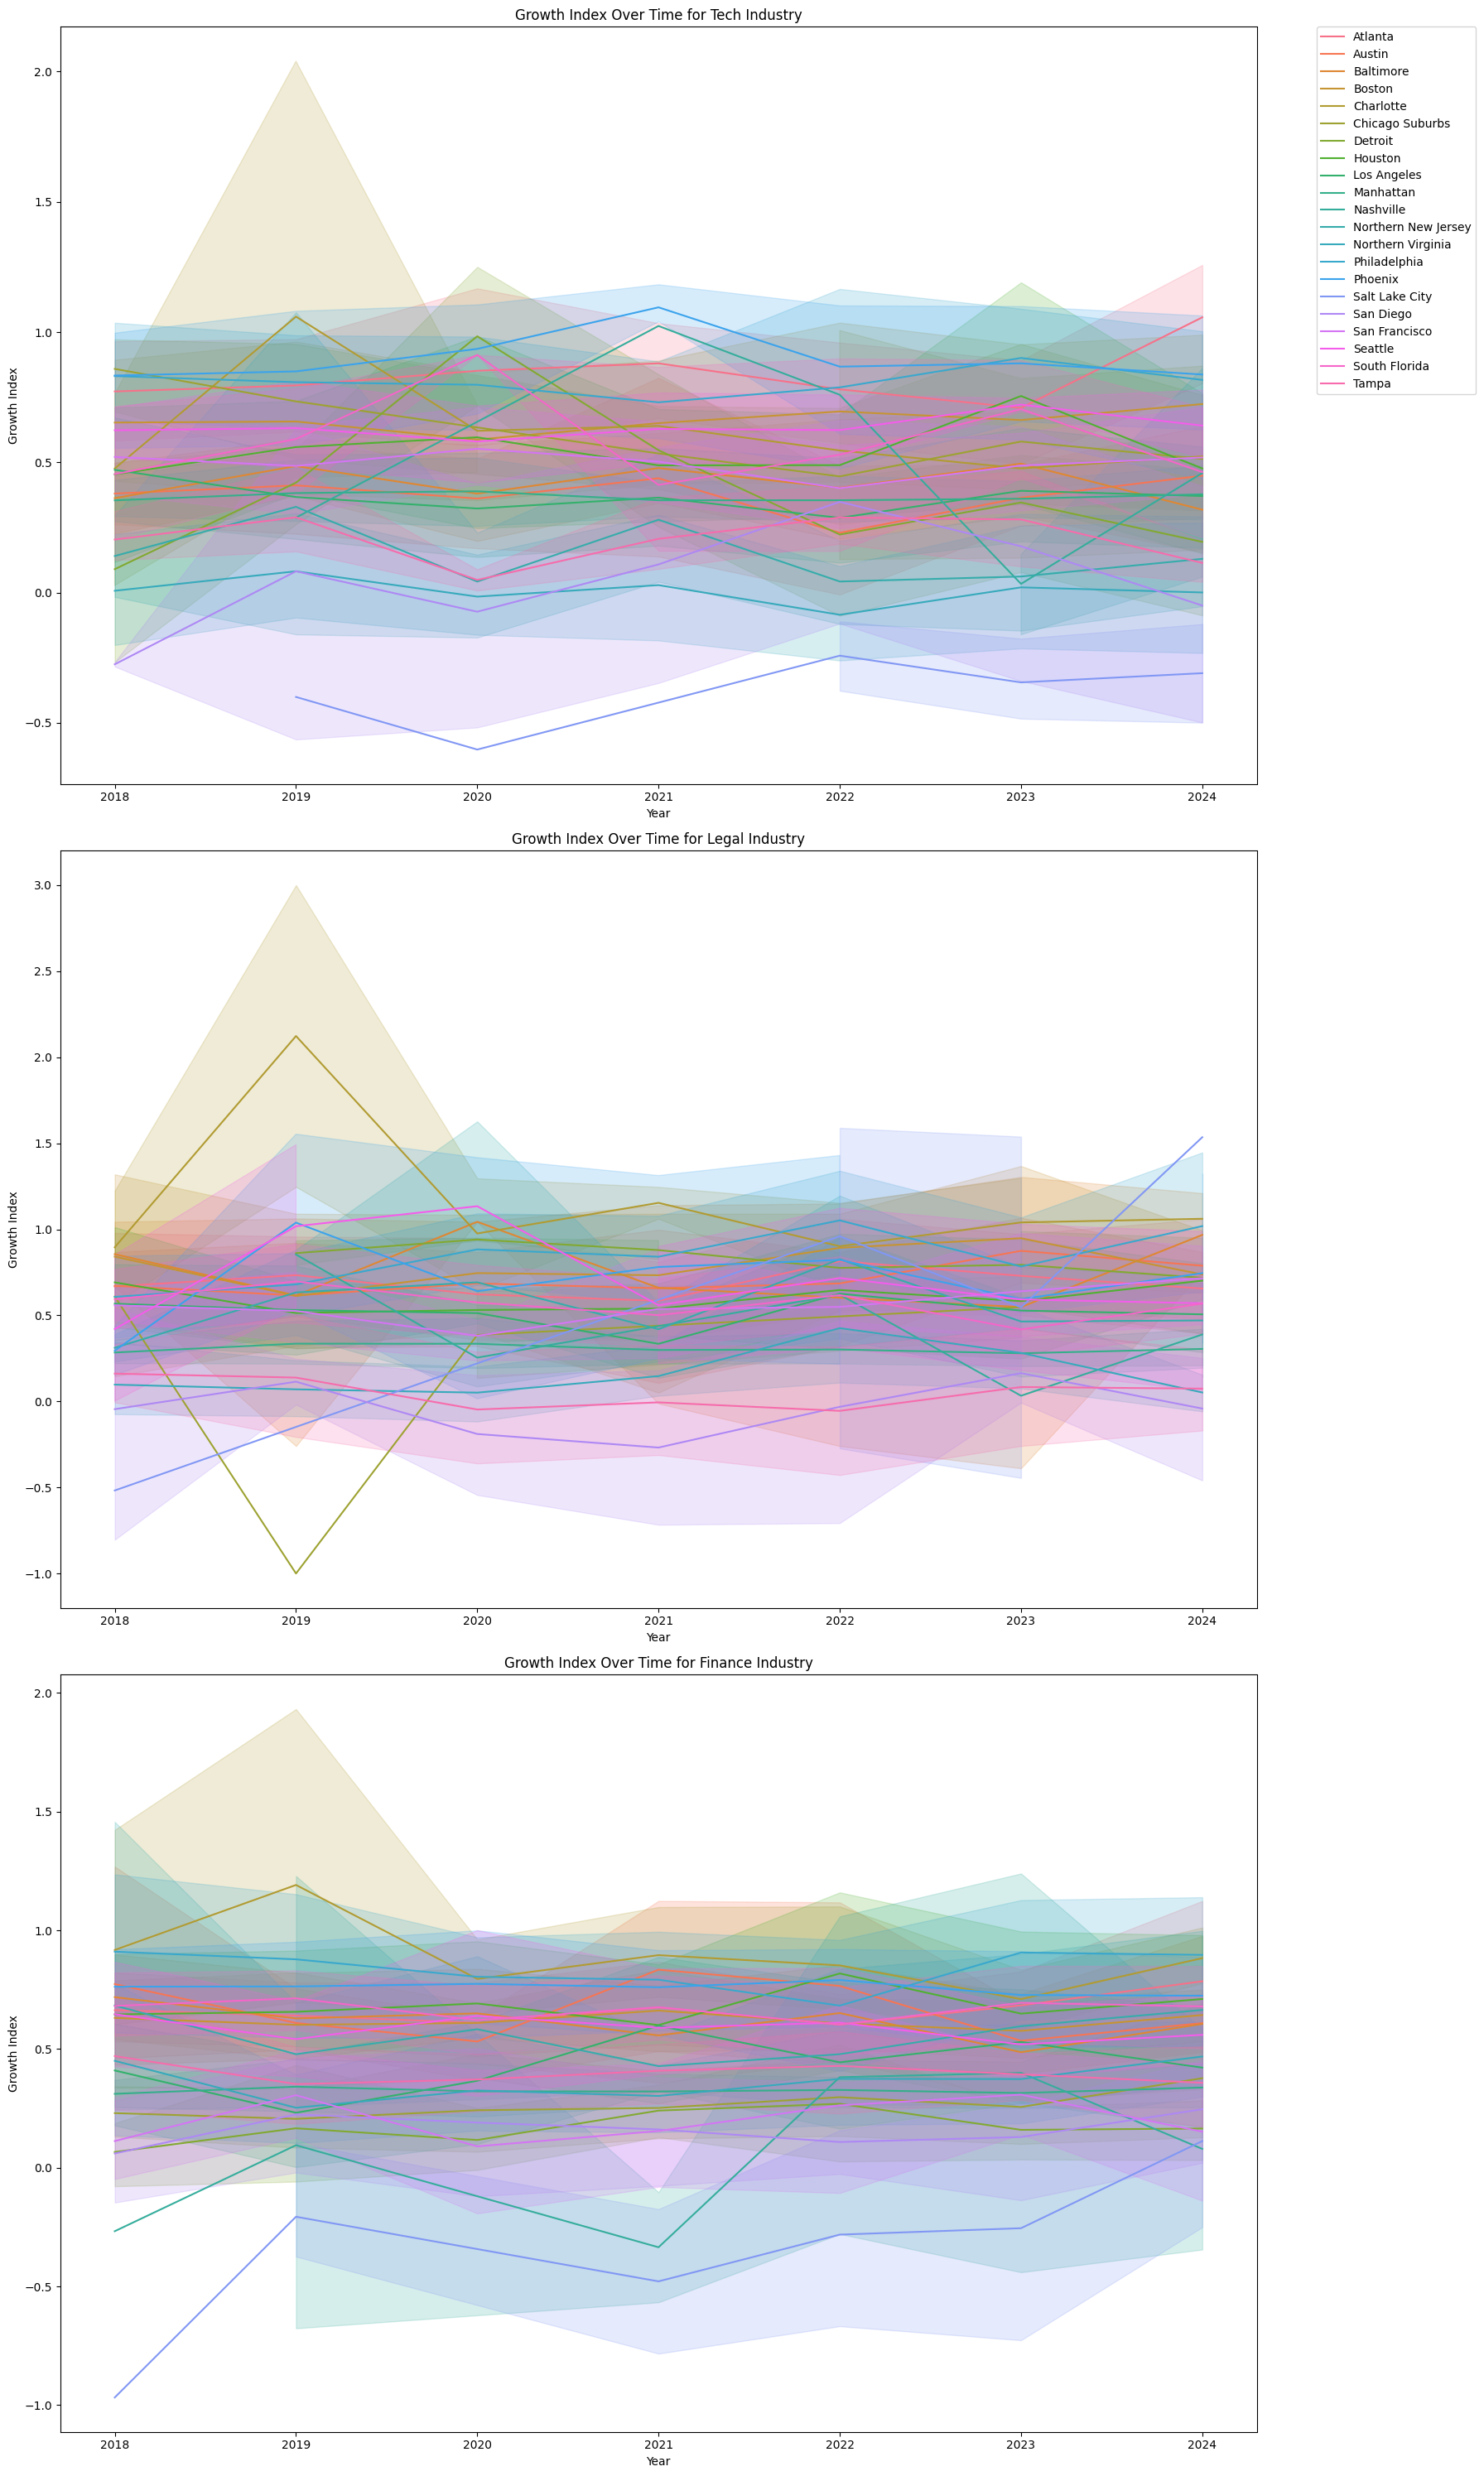

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Paired")

# Create a 3-row, 1-column grid of subplots
fig, axes = plt.subplots(3, 1, figsize=(18, 30))

# Set titles for the subplots
axes[0].set_title('Growth Index Over Time for Tech Industry')
axes[1].set_title('Growth Index Over Time for Legal Industry')
axes[2].set_title('Growth Index Over Time for Finance Industry')

# Plot for Technology Industry (df_tech)
sns.lineplot(data=df_tech, x='year', y='growth_index_rescaled', hue='market', ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Growth Index')

# Plot for Legal Industry (df_legal)
sns.lineplot(data=df_legal, x='year', y='growth_index_rescaled', hue='market', ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Growth Index')

# Plot for Financial Industry (df_finance)
sns.lineplot(data=df_finance, x='year', y='growth_index_rescaled', hue='market', ax=axes[2])
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Growth Index')

axes[0].legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
axes[1].legend().remove()
axes[2].legend().remove()

# Improve layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


## forecasting

internal_class_rent, growth_index_rescaled

### internal_class_rent

#### tech

In [144]:
df_tech.head(5)

,market,quarter,year,county_name,internal_industry,internal_class,go_proportion,quarter_percent_change_lease,worked_at_home_rate,internal_class_rent,normalized_go_proportion,normalized_percent_change_leases,normalized_remote_work,growth_index,growth_index_normalized,growth_index_rescaled
3,Atlanta,Q1,2018,Fulton County,"Technology, Advertising, Media, and Information",A,0.789474,34.187179,0.041473,27.655891,0.871503,0.400902,-0.916915,0.739405,-0.018539,0.962922
4,Atlanta,Q1,2018,Fulton County,"Technology, Advertising, Media, and Information",O,0.789474,-20.304267,0.041473,18.560886,0.871503,-0.435005,-0.916915,0.488633,-0.107226,0.785548
8,Atlanta,Q1,2019,Fulton County,"Technology, Advertising, Media, and Information",A,0.789474,80.175829,0.041473,30.044474,0.871503,1.106376,-0.916915,0.951047,0.056310,1.112619
12,Atlanta,Q1,2020,Fulton County,"Technology, Advertising, Media, and Information",A,0.789474,42.400032,0.041473,32.068992,0.871503,0.526889,-0.916915,0.777201,-0.005172,0.989656
13,Atlanta,Q1,2020,Fulton County,"Technology, Advertising, Media, and Information",O,0.789474,-45.887464,0.041473,21.716556,0.871503,-0.827456,-0.916915,0.370898,-0.148864,0.702272


In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# --- Step 1: Convert year + quarter to a datetime index ---
def quarter_to_date(year, quarter):
    quarter_start_month = {'Q1': 1, 'Q2': 4, 'Q3': 7, 'Q4': 10}
    start_month = quarter_start_month.get(quarter, 1)
    return pd.Timestamp(year=int(year), month=start_month, day=1)

df['date'] = df.apply(lambda row: quarter_to_date(row['year'], row['quarter']), axis=1)
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

# --- Step 2: Forecasting per (market, internal_class) ---
forecast_data = []

for (market, internal_class), group_df in df.groupby(['market', 'internal_class']):
    print(f"\n🔍 Processing: Market = {market}, Internal Class = {internal_class}")
    
    # Only keep date and rent
    ts = group_df[['internal_class_rent']].copy()
    ts = ts.sort_index()

    # Ensure no missing dates (optional, can forward fill)
    ts = ts[~ts.index.duplicated(keep='first')]
    ts = ts.asfreq('QS')  # Set as Quarterly Start frequency

    # --- ADF Test for Stationarity ---
    adf_result = adfuller(ts['internal_class_rent'].dropna())
    print(f"ADF Statistic: {adf_result[0]:.4f}, p-value: {adf_result[1]:.4f}")
    if adf_result[1] > 0.05:
        print("❗ Non-stationary — differencing will be applied.")
    else:
        print("✅ Stationary — safe to proceed.")

    # --- Fit SARIMA Model ---
    model = SARIMAX(ts['internal_class_rent'],
                    order=(1, 1, 1),
                    seasonal_order=(1, 1, 1, 4),
                    enforce_stationarity=False,
                    enforce_invertibility=False)

    model_fit = model.fit(disp=False)
    print(model_fit.summary())

    # --- Forecast the next 4 quarters ---
    steps = 4
    forecast = model_fit.get_forecast(steps=steps)
    future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.QuarterBegin(),
                                 periods=steps, freq='QS')

    forecast_df = pd.DataFrame({
        'date': future_dates,
        'forecast': forecast.predicted_mean.values,
        'lower_ci': forecast.conf_int().iloc[:, 0].values,
        'upper_ci': forecast.conf_int().iloc[:, 1].values,
        'market': market,
        'internal_class': internal_class
    })

    forecast_data.append(forecast_df)

# --- Step 3: Combine All Forecasts ---
forecast_results_df = pd.concat(forecast_data, ignore_index=True)

# Optional: Save or inspect
forecast_results_df.to_csv('forecast_results.csv', index=False)
print("\n📈 Forecast Preview:")
print(forecast_results_df.head(10))




🔍 Processing: Market = Atlanta, Internal Class = A
ADF Statistic: -2.1437, p-value: 0.2273
❗ Non-stationary — differencing will be applied.
                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                  -9.567
Date:                           Sat, 12 Apr 2025   AIC                             29.134
Time:                                   21:53:08   BIC                             33.300
Sample:                               01-01-2018   HQIC                            29.548
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                  -3.239
Date:                           Sat, 12 Apr 2025   AIC                             16.479
Time:                                   21:53:08   BIC                             20.645
Sample:                               01-01-2018   HQIC                            16.893
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7481      0.306      2.447      0.014       0.149       1.347
ma.L1         -0.9903     17.484     -0.057

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -20.146
Date:                           Sat, 12 Apr 2025   AIC                             50.293
Time:                                   21:53:08   BIC                             54.459
Sample:                               01-01-2018   HQIC                            50.707
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5519      1.249      0.442      0.659      -1.896       3.000
ma.L1         -0.6155      1.225     -0.502

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                   2.519
Date:                           Sat, 12 Apr 2025   AIC                              4.961
Time:                                   21:53:08   BIC                              9.127
Sample:                               01-01-2018   HQIC                             5.375
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5839      0.432      1.350      0.177      -0.264       1.431
ma.L1         -8.4688     35.117     -0.241

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -13.057
Date:                           Sat, 12 Apr 2025   AIC                             36.113
Time:                                   21:53:09   BIC                             40.279
Sample:                               01-01-2018   HQIC                            36.527
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1058      6.269     -0.017      0.987     -12.394      12.182
ma.L1         -0.0038      5.986     -0.001

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -12.840
Date:                           Sat, 12 Apr 2025   AIC                             35.679
Time:                                   21:53:10   BIC                             39.846
Sample:                               01-01-2018   HQIC                            36.094
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1063      8.545     -0.012      0.990     -16.854      16.642
ma.L1          0.1649      8.535      0.019

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -14.048
Date:                           Sat, 12 Apr 2025   AIC                             38.095
Time:                                   21:53:10   BIC                             42.261
Sample:                               01-01-2018   HQIC                            38.509
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5209      0.608      0.857      0.392      -0.671       1.713
ma.L1         -1.2132      0.772     -1.571

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   24
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -20.278
Date:                           Sat, 12 Apr 2025   AIC                             50.556
Time:                                   21:53:11   BIC                             53.381
Sample:                               01-01-2019   HQIC                            49.975
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3744      0.473      0.792      0.428      -0.552       1.301
ma.L1          1.0005   3060.532      0.000

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                  -7.655
Date:                           Sat, 12 Apr 2025   AIC                             25.310
Time:                                   21:53:11   BIC                             29.476
Sample:                               01-01-2018   HQIC                            25.724
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5641      0.803     -0.703      0.482      -2.137       1.009
ma.L1          0.4382      0.884      0.496

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                   0.372
Date:                           Sat, 12 Apr 2025   AIC                              9.256
Time:                                   21:53:11   BIC                             13.422
Sample:                               01-01-2018   HQIC                             9.670
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4153      0.349     -1.191      0.234      -1.099       0.268
ma.L1          1.0000   1822.483      0.001

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



🔍 Processing: Market = Phoenix, Internal Class = O
ADF Statistic: -1.0094, p-value: 0.7498
❗ Non-stationary — differencing will be applied.
                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                  -7.023
Date:                           Sat, 12 Apr 2025   AIC                             24.045
Time:                                   21:53:12   BIC                             28.211
Sample:                               01-01-2018   HQIC                            24.459
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -25.862
Date:                           Sat, 12 Apr 2025   AIC                             61.724
Time:                                   21:53:12   BIC                             65.890
Sample:                               01-01-2018   HQIC                            62.138
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5324      0.172      3.097      0.002       0.195       0.869
ma.L1         -0.9998    448.882     -0.002

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -23.208
Date:                           Sat, 12 Apr 2025   AIC                             56.416
Time:                                   21:53:13   BIC                             60.582
Sample:                               01-01-2018   HQIC                            56.830
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2804      0.139      2.015      0.044       0.008       0.553
ma.L1          0.0728      0.359      0.203

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -17.929
Date:                           Sat, 12 Apr 2025   AIC                             45.858
Time:                                   21:53:13   BIC                             50.024
Sample:                               01-01-2018   HQIC                            46.272
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0367      2.594     -0.014      0.989      -5.120       5.047
ma.L1         -0.1440      2.605     -0.055

In [161]:
forecasted_tech = pd.read_csv("forecast_results.csv")
forecasted_tech.head(5)

,date,forecast,lower_ci,upper_ci,market,internal_class
0,2025-01-01,35.203516,34.396237,36.010795,Atlanta,A
1,2025-04-01,35.105804,34.060449,36.151160,Atlanta,A
2,2025-07-01,35.316716,34.132544,36.500888,Atlanta,A
3,2025-10-01,36.560508,35.284644,37.836372,Atlanta,A
4,2025-01-01,25.314493,24.790655,25.838330,Atlanta,O


##### first attempt

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming `df` is your DataFrame containing the time series data
# Prepare the date index
df['date'] = pd.to_datetime(df['year'].astype(str) + 'Q' + df['quarter'].astype(str))
df.set_index('date', inplace=True)

# Check for stationarity using the Augmented Dickey-Fuller (ADF) test
result = adfuller(df['internal_class_rent'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# If p-value > 0.05, data is non-stationary; otherwise, it's stationary
if result[1] > 0.05:
    print("The time series is non-stationary. Differencing is required.")
else:
    print("The time series is stationary.")

# Plot ACF and PACF to determine AR, MA orders
plot_acf(df['internal_class_rent'], lags=40)
plot_pacf(df['internal_class_rent'], lags=40)
plt.show()




C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\1459076771.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['year'].astype(str) + 'Q' + df['quarter'].astype(str))


DateParseError: Unknown datetime string format, unable to parse: 2018QQ1, at position 0

In [ ]:

# Fit a SARIMA model (example: p=1, d=1, q=1, P=1, D=1, Q=1, S=4)
sarima_model = SARIMAX(df['internal_class_rent'], 
                       order=(1, 1, 1),  # ARIMA order (p, d, q)
                       seasonal_order=(1, 1, 1, 4))  # Seasonal order (P, D, Q, S), S=4 for quarterly data
sarima_model_fit = sarima_model.fit(disp=False)

# Print model summary to get p-values and other statistics
print(sarima_model_fit.summary())

# Evaluate AIC to compare model fits (lower AIC is better)
print(f"AIC: {sarima_model_fit.aic}")


In [ ]:
# Forecast next 4 quarters (1 year)
forecast_steps = 4
forecast = sarima_model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Print forecast values and confidence intervals
print(f"Forecasted values (next 4 quarters):\n{forecast_mean}")
print(f"Confidence intervals:\n{forecast_conf_int}")

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['internal_class_rent'], label="Historical Data")
plt.plot(forecast_mean.index, forecast_mean, label="Forecast", color='red')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2)
plt.title("SARIMA Forecast for Internal Class Rent (Next 1 Year)")
plt.legend(loc="best")
plt.show()

In [ ]:
# Check residuals of the model
residuals = sarima_model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of SARIMA Model')
plt.show()

# Perform Ljung-Box test on residuals to check for autocorrelation
ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(f"Ljung-Box Test Results:\n{ljung_box_test}")

# Check histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.show()

# Check if residuals are normally distributed (QQ-Plot)
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

# Calculate residual diagnostics (p-values, etc.)
print(f"Mean of residuals: {residuals.mean()}")
print(f"Standard deviation of residuals: {residuals.std()}")

In [ ]:
# to save the values to the df

# Forecast next 4 quarters (1 year)
forecast_steps = 4
forecast = sarima_model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create a new DataFrame with forecasted values and confidence intervals
forecast_df = pd.DataFrame(forecast_mean, columns=['forecast'], index=forecast_mean.index)
forecast_conf_df = pd.DataFrame(forecast_conf_int, columns=['lower_ci', 'upper_ci'], index=forecast_conf_int.index)

# Merge the forecasted values and confidence intervals back to the original DataFrame
forecast_combined = pd.concat([df, forecast_df, forecast_conf_df], axis=1)

# Display the combined DataFrame with historical and forecasted values
print(forecast_combined.tail(10))  # Check the last few rows to see the forecast added

# Optionally, save it to a new CSV file
forecast_combined.to_csv('forecasted_internal_class_rent.csv')


## lowkey don't remember what the following were for but i refuse to delete code

In [ ]:
df[['quarter_percent_change_lease', 'go_stay']]

In [8]:
df.head()

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing,quarter_percent_change_lease
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,NaN
1,2018,Q1,1.0,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,0.000000
2,2018,Q1,1.0,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,0.000000
3,2018,Q1,1.0,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0,-40.608534
4,2018,Q1,1.0,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,68.374358


In [ ]:
print("lease: ", leases['market'].value_counts())
print("mmod: ", mmod['market'].value_counts())

In [3]:
print("Leases: ", leases.shape, "\n", leases.head(3), "\n")
print("Major Market Occupancy: ", mmod.shape, "\n", mmod.head(3))

   year quarter  monthsigned   market            building_name  \
0  2018      Q1          1.0  Atlanta  10 Glenlake North Tower   
1  2018      Q1          1.0  Atlanta            100 City View   
2  2018      Q1          1.0  Atlanta            1000 Parkwood   

                                         building_id               address  \
0  Atlanta_Central Perimeter_Atlanta_10 Glenlake ...    10 Glenlake Pky NE   
1  Atlanta_Northwest_Atlanta_100 City View_3330 C...  3330 Cumberland Blvd   
2  Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...  1000 Parkwood Cir SE   

  region     city state  ...  overall_rent direct_available_space  \
0  South  Atlanta    GA  ...     24.345689                    NaN   
1  South  Atlanta    GA  ...     24.345689                    NaN   
2  South  Atlanta    GA  ...     24.345689                    NaN   

  direct_availability_proportion  direct_internal_class_rent  \
0                            NaN                         NaN   
1                